In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the CIFAR-10 dataset
(_, _), (x_test, y_test) = cifar10.load_data()

# Define the class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
x_test = x_test.astype('float32') / 255.0
y_test = to_categorical(y_test)

In [ ]:
# Evaluate the wl_model on the test data
wl_model = tf.keras.models.load_model('drive/MyDrive/DeepDying/wl_mobilenet_model.h5')

loss, accuracy = wl_model.evaluate(x_test, y_test, verbose=1)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 3s 9ms/step - loss: 0.9781 - accuracy: 0.7158
Test Loss: 0.9781020283699036
Test Accuracy: 0.7157999873161316


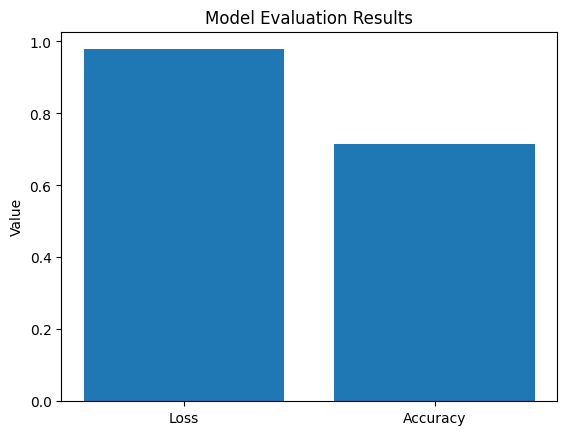

In [ ]:
evaluation_results = {'Loss': loss, 'Accuracy': accuracy}
plt.bar(evaluation_results.keys(), evaluation_results.values())
plt.ylabel('Value')
plt.title('Model Evaluation Results')
plt.show()

313/313 [==============================] - 1s 4ms/step


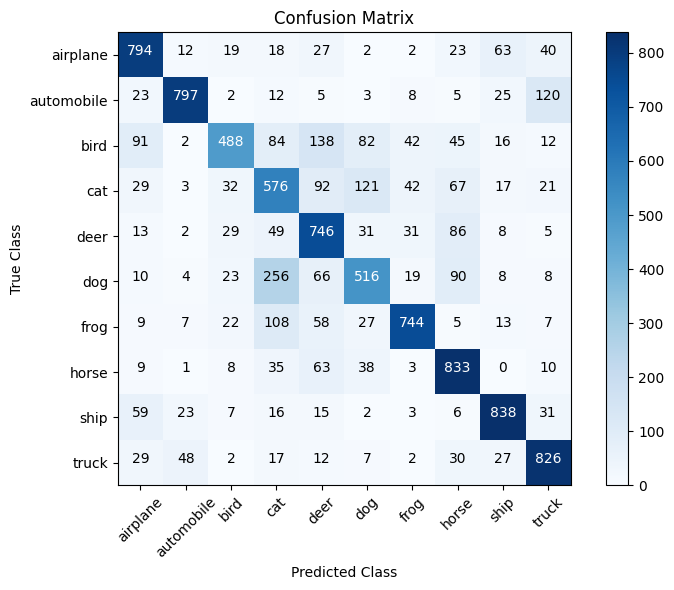

In [ ]:
y_pred = wl_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the values in each cell of the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

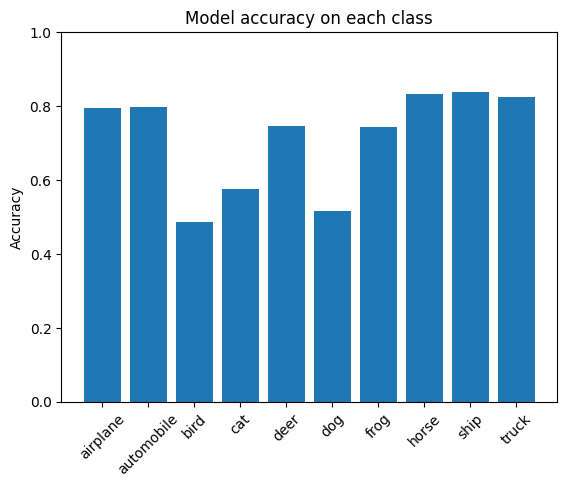

In [ ]:
# plot the % of accuracy on each class
acc_class = []
for i in range(cm.shape[0]):
  acc_class.append(cm[i][i]/sum(cm[i]))
plt.bar(class_names, acc_class)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model accuracy on each class')
plt.show()

In [ ]:
# Evaluate the pr_model on the test data
pr_model = tf.keras.models.load_model('drive/MyDrive/DeepDying/pr_mobilenet_model.h5')

loss, accuracy = pr_model.evaluate(x_test, y_test, verbose=1)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 4s 9ms/step - loss: 0.8181 - accuracy: 0.7326
Test Loss: 0.8180649876594543
Test Accuracy: 0.7325999736785889


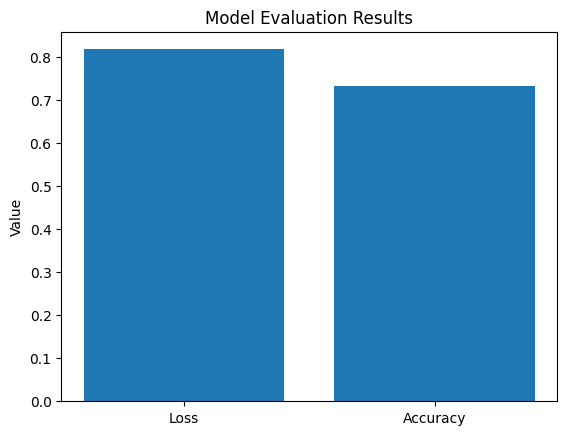

In [ ]:
evaluation_results = {'Loss': loss, 'Accuracy': accuracy}
plt.bar(evaluation_results.keys(), evaluation_results.values())
plt.ylabel('Value')
plt.title('Model Evaluation Results')
plt.show()

313/313 [==============================] - 1s 4ms/step


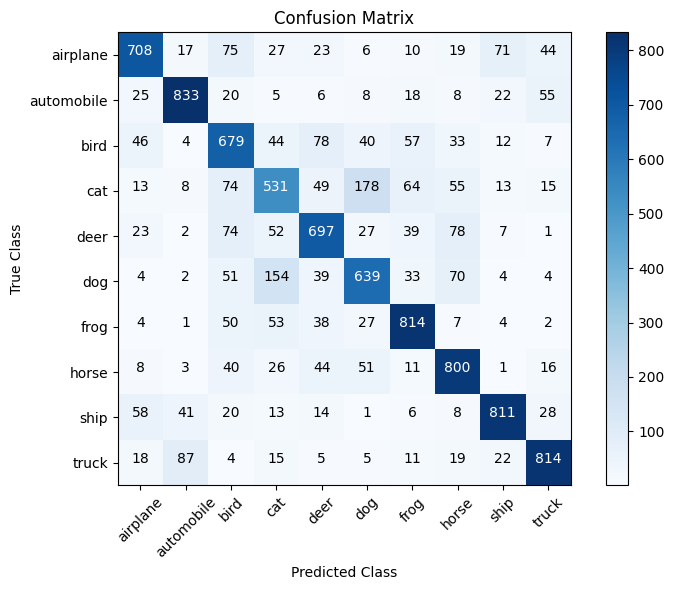

In [ ]:
y_pred = pr_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the values in each cell of the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

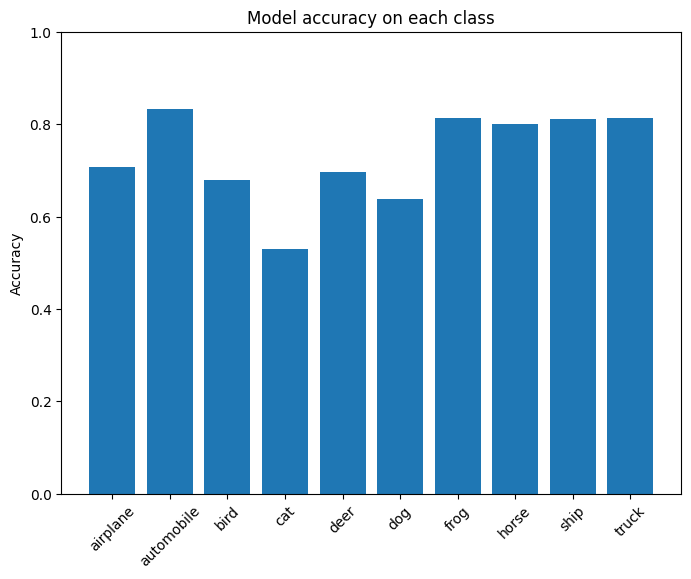

In [ ]:
# plot the % of accuracy on each class
acc_class = []
for i in range(cm.shape[0]):
  acc_class.append(cm[i][i]/sum(cm[i]))
plt.figure(figsize=(8, 6))
plt.bar(class_names, acc_class)
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model accuracy on each class')
plt.show()